In [3]:
### Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from mpl_toolkits import mplot3d
from matplotlib import rc
#rc('text', usetex=True)


### Plot configuration

fig_width = 4.2 # width in inches
fig_height = 3.  # height in inches
fig_size =  [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# **##################### Problem 1 #####################**

The aim of this problem is to get familiar with the equations that define RNN dynamics. All the questions, except **e** and **f**, do not require any programming but can be solved with a pencil, a paper, and a bit of thinking.

We have seen during the lecture that RNN dynamics are given by

$$\frac{d x_{i}(t)}{d t}=-x_{i}(t)+\sum_{j=1}^{N} J_{i j} \phi(x_{j}(t))+h_{i}(t).$$

Variable $x_i$ represents the input current entering neuron $i$, while $\phi(x_i)$ represents the output firing rate. $J_{ij}$ is a $N\times N$ matrix representing recurrent connectivity, and $h_i$ is the external input received by neuron $i$.

In this problem set, like in the first part of the lecture, we generate the recurrent connectivity at random from a Gaussian distribution: we set 
$$J_{ij}\sim \mathcal{N}\left(0, \frac{g^2}{N}\right).$$

In this first exercise, we also assume that neurons receive no input: $h_{i}(t)=0$.

How can we study the dynamics that emerge from this set of equations, where the activity of each neuron input current variable $x_i(t)$ is strongly dependent on the behavior of many other variables?
We follow the approach used in Dynamical Systems Theory and start our analysis by looking for special activity states, i.e. fixed points, that we indicate by $\mathbf{x}^* = [x^*_1, \dots, x^*_N]^T$ (written as a column vector). At the fixed points, current variables are stationary (i.e. they do not vary over time). Fixed point states thus obey:
$$\frac{d x_{i}}{d t}\biggr\rvert_{x_i=x_i^*}=0 \implies x_i^* = \sum_{j=1}^{N} J_{i j} \phi(x_{j}^*).
$$


**a)**  To begin with, as in the lecture, we consider a linear RNN: we take $\phi(x)=x$. Write down the fixed point equation in this case. This equation admits a very simple fixed point $\mathbf{x}^*$. Can you guess what this fixed point is? Do you think that this fixed point is the only one admitted by the dynamics? *Hint: this is a linear system of equations!*

**SOLUTION:** The simple fixed point is $x_i^*=0$ $\forall i$, and it is the only one. This fixed point, where the input current variables of all neurons are zero, is called the trivial fixed point.

 To see that is the only one, we notice that we have 

 $$(-I+J)\vec x=0$$ has only one solution if J is full rank, which it is. 

**b)** Let's now turn to a non-linear RNN. As a first step, we take $\phi(x)=\tanh(x)$. Write down the fixed point equation in this case. Can you guess a simple fixed point? Is this simple fixed point guaranteed to be the only one?

**SOLUTION:** The RNN admits the same fixed point, but now it is hard to guess a priori whether or not other fixed points are admitted.

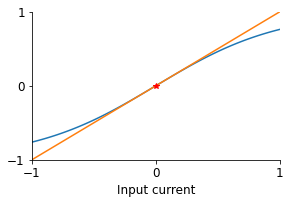

In [4]:

#Define the  nonlinearity
def phi(x):
  return np.tanh(x)

# This function finds the intersection
def SteadyStatesFunction_single_neuron(x,J,H):
  out=-x+J*phi(x)+H
  return out
        
# We choose some simple parameters and find the intersection numerically
J=1
H=0       
sol=optimize.root(SteadyStatesFunction_single_neuron,
                  np.random.rand(), 
                  args=(J,H),
                  tol=1e-10);
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### ####
#### Plot intersection between x and tanh

fg = plt.figure()
ax0 = plt.axes(frameon=True)
x_range=1
x=np.linspace(-x_range,x_range,100)


# Plot intersection
plt.plot(x,phi(x))
plt.plot(x,x)

#### Plot the solution found numerically with the solver
plt.plot(sol.x,phi(sol.x),'*r')


plt.xlabel('Input current')

plt.xlim(-x_range, x_range)
plt.ylim(-x_range, x_range)
plt.xticks([0, -x_range, x_range])
plt.yticks([0,-x_range, x_range])
plt.show()

**c)** Fixed points are stationary states of the dynamics: this means that if the RNN is initialized at the fixed point, it will stay there. Now assume that the network is initialized at a state $x_i(t)$ that is *close* to the fixed point: we take
$$ x_i(t) = x_i^* + \delta x_i(t)$$
where $\delta x_i(t)$ is small. Derive the dynamics that is obeyed by $\delta x_i(t)$. Then approximate those dynamics by Taylor expanding the non-linearity $\phi(x_i)$ close to the simple fixed point, and keep only the first-order. *Hint: the derivative of $\phi(x)=\tanh(x)$ is $\phi'(x)=1-\tanh^2(x)$!*

**SOLUTION:** We have
$$\underbrace{\delta x_i}_\textrm{small perturbation} = \underbrace{x_i(t)}_\textrm{current neuron state} - \underbrace{x_i^*}_\textrm{neuron state at fixed point}$$

Its dynamics are given by:
$$\frac{d \delta x_i}{dt} = \frac{d}{dt}(x_i(t)-x_i^*) = \frac{dx_i}{dt} $$
Thus:
$$\frac{d \delta x_i}{dt} = - x_i^* - \delta x_i + \sum_{j=1}^N J_{ij} \phi(x_j^* + \delta x_j). $$

We observe that $x_i^*= 0$.
We now use the Taylor expansion:
$$\phi(x_j^* + \delta x_j) = \underbrace{\phi(x_j^*)}_{\mathrm{cancels}} +  \phi'(x_j^*)\delta x_j + \underbrace{ \mathcal{O}(\delta x_j^2) +  ...}_\textrm{higher order terms we can ignore}$$

We compute $\phi'(x)$ and evaluate it at $x_j^*= 0$:
$$
\phi'(x) = \frac{d \tanh(x)}{dx} =1 - \tanh^2(x) 
$$
$$ 1 - \tanh^2(x) \biggr\rvert_{x_j^* = 0} = 1$$

We finally have that dynamics obey
$$
 \frac{d\delta{x}_i}{dt}=-\delta x_i+  \sum_{j=1}^{N}  J_{ij} \delta x_j 
$$
which are the linear dynamics we started from.

$$
 \frac{d\delta{ \vec{x}}}{dt}=(-I+J) \delta \vec{x}
$$

**d)** We can now use the approximate dynamics we derived to understand the RNN behavior close to the fixed point.
If everything went well, the approximate dynamics you obtained are linear. What is the expected qualitative behavior of the solution of these dynamics ? Is activity guaranteed to go back to the simple fixed point? *Hint: Kanaka has shown this in the lecture...* 

**SOLUTION:** Activity can go back to the trivial fixed point (because $\delta x_i \rightarrow 0$ as time evolves), or go very far from it (because $\delta x_i \rightarrow \infty$ as time evolves). 

**e)** Linear algebra tells us that $\delta x_i$ will diverge when there is (at least) one eigenvalue of $J_{ij}$ whose real part is larger than 1. By using your favourite programming language, generate a random RNN with $N=200$ and $g=0.8$. Then compute the eigenvalues of $J_{ij}$. How many are them? Plot the eigenvalues on a plane where the x and the y axes correspond respectively to the real and the imaginary parts of eigenvalues. What is the shape that eigenvalues span on those planes? How does $g$ control the shape, and the value of the maximal real part? *Hint: in Python, you can use the numpy.linalg.eigvals function*

**SOLUTION:**

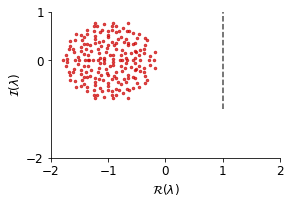

In [8]:
### Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from mpl_toolkits import mplot3d
from matplotlib import rc
#rc('text', usetex=True)

### Plot configuration

fig_width = 4.2 # width in inches
fig_height = 3.  # height in inches
fig_size =  [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

#### #### #### #### #### #### ####
#### Generate network parameters

N = 200               # Network size
g = 0.8              # Connectivity strength

# Connectivity

J = g/np.sqrt(N) * np.random.normal(0, 1., (N,N))
eig = np.linalg.eigvals(-np.eye(N)+J)

#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### ####
#### Plot eigenspectrum of J

fg = plt.figure()
ax0 = plt.axes(frameon=True)

line, = plt.plot([1,1], [-1,1], '--', color = '0.3')

plt.plot(eig.real, eig.imag, 'o', color='#CC0000', markersize = 2.5, alpha = 0.7)

# Plot a circle of radius g

theta = np.linspace(0, 4*np.pi, 200)
# plt.plot(g*np.cos(theta), g*np.sin(theta), 'k')

plt.xlim(-2,2)
plt.ylim(-1,1)
plt.yticks([-2,0,1])

plt.xlabel('$\mathcal{R}(\lambda)$')
plt.ylabel('$\mathcal{I}(\lambda)$')

plt.locator_params(nbins=4)

plt.show()

**f) Optional** We have learnt from the previous point that approximately when $g>1$, activity diverges away from the simple fixed point.
In that case, we say that the fixed point is *unstable*, we don't know apriori what will happen: Dynamical Systems Theory indicates that other fixed points, limit cycles, or chaotic attractors might emerge. Understanding the behavior of random RNNs in this case is the focus of the next exercise.

We consider here a different issue.
In the RNN we just examined, we assumed that $\phi(x)=\tanh(x)$. This was in fact a very lucky choice, because we were able to easily guess the value of the fixed point that is admitted by the dynamics, and evaluate activity evolution around it. In RNNs characterized by a general activation function, finding the fixed points can be hard, because easy guesses do not work. For example, we will use an activation function that generates only positive firing rates:
$$\phi(x)=\frac{1}{2}\left(\tanh(x)+1\right).$$
 A way of doing this is to use numerics to solve the fixed point equations. 
Choose a solver in your favourite programming language, and solve the fixed point equations numerically. Use $N=50$, $g=0.8$. *Hint: in Python, you can use the function root from the scipy.optimize package*.
What is the value of the fixed point? Is the current variable $x_i^*$ for every neuron the same as in the simple fixed point? Print the histogram of entries $x_i^*$; then go back to $\phi(x)=\tanh(x)$, and plot the histogram again. Side note: is this the only fixed point? How would you test this numerically?

**SOLUTION:**

[ 0.17318797  0.8244302   0.01258231  0.33776866  0.68121068 -0.10763753
 -0.00197839 -0.23682655 -0.79552382  0.1097235  -0.24963938 -0.0154437
 -0.19891007  0.77288591  0.06170918 -0.07865215 -0.64762784 -0.81690728
  0.13140075  0.47394289  0.91890039 -0.04618493  0.18935629  0.24349304
 -0.49446595  0.40201458  0.37698033 -0.09843909 -0.02040727  0.22565066
 -0.20784145 -0.02944336  0.68761448 -0.74781253  0.29938377  0.47618828
  1.00643545  0.71821513 -0.09143124 -0.06262133  0.89455847  0.08310004
  0.2032138  -1.01862223  0.66107794  0.3357393  -0.45037308  0.6079621
 -0.02719605  0.07749938]


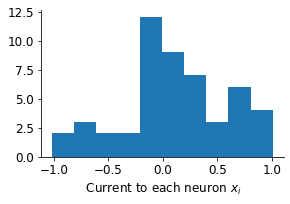

In [ ]:
#### #### #### #### #### #### ####
#### Find the fixed point

#Define the non-linearity
def Phi(x):
  return (np.tanh(x)+1.)/2.
  # return np.tanh(x)

# This function finds the intersection
def FixedPointEq(x,J):
  out = - x + np.dot(J, Phi(x))
  return out

initial_guess = np.random.normal(0, 0.1, N)
sol = optimize.root(FixedPointEq, initial_guess, args=(J) ,tol=1e-10)

#### #### #### #### #### #### ####
#### Plot the histogram

fg = plt.figure()
ax0 = plt.axes(frameon=True)

plt.hist(sol.x)

plt.xlabel(' Current to each neuron $x_i$')

plt.show()

**g) Optional** The RNN dynamics that we have considered in this exercise and in the main lecture, which is written in terms of the input current variable $x_i(t)$, is only one among the two formalisms that are commonly used in the field. Another common choice is 
$$\frac{d r_{i}(t)}{d t}=-r_{i}(t)+\phi\left(\sum_{j=1}^{N} J_{i j} r_j(t)+h_{i}(t)\right)$$
where variable $r_i(t)$ is interpreted as the output firing rate of the neuron (instead of $\phi(x_i)$).

 These two formalisms are in practice equivalent to each other, and are used indistinctly in the literature. 
 
 If we consider constant external inputs, $h_{i}(t) = h_i$, there is a simple one-to-one mapping between both descriptions. Show that the two dynamics are exactly equivalent in this case: we can use a change of variable to transform one set of equations into the other. *Hint: define the variable $x_k = \sum_{i=1}^N J_{ki} r_i + h_k$, and derive its time evolution...*

 The equivalence between both descriptions in the case of time-dependent  external inputs is discussed in this note: Miller & Fumarola (2012).


**SOLUTION:** We have
$$
\frac{dx_k(t)}{dt} = \sum_{i=1}^N J_{ki} \frac{dr_i(t)}{dt} = \sum_{i=1}^N J_{ki} \left( -r_{i}(t)+\phi\left(\sum_{j=1}^{N} J_{i j} r_j(t)+h_{i}\right)  \right)
= - x_k + h_k + \sum_{i=1}^N J_{ki} \phi(x_i).
$$


For instance, the input current description is  used in the following studies: Sompolinsky, Crisanti & Sommers (1988),  Sussillo & Abbott. (2009), Laje & Buonomano (2013), Wang, Narain, Hosseini & Jazayeri (2018)..., while the rate-based description is used in: Wilson and Cowan (1972, 1973), Ben-Yishai, Hansel & Sompolinsky (1994), Dayan & Abbott book, Vogels, Rajan & Abbott (2005), Wong and Wang (2006),...